# Import

In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LassoCV,Lasso,Ridge,RidgeCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from warnings import simplefilter
import warnings

# Read data

In [39]:
hitters = pd.read_csv("Hitters.csv")

In [40]:
hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


# Data Processing

In [41]:
# Rename the column name of players' name
hitters = hitters.rename(columns={'Unnamed: 0':'Player'})

In [42]:
hitters.head()

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [43]:
hitters.dtypes

Player        object
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

As we can see, "League", "Division" and "NewLeague" are not numeric, so we only use other numeric predictors.

In [44]:
hitters = hitters.drop(columns = ["League","Division","NewLeague"])
hitters.head()

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5


Drop NA

In [45]:
# drop NA
hitters = hitters.dropna(axis=0)
hitters.reset_index(inplace=True,drop=True)
hitters.isna().sum()

Player     0
AtBat      0
Hits       0
HmRun      0
Runs       0
RBI        0
Walks      0
Years      0
CAtBat     0
CHits      0
CHmRun     0
CRuns      0
CRBI       0
CWalks     0
PutOuts    0
Assists    0
Errors     0
Salary     0
dtype: int64

Now, the data has no null value and then do the LASSO regression.

# 1.1 LASSO Regression

Text(0.5, 1.0, 'Lasso')

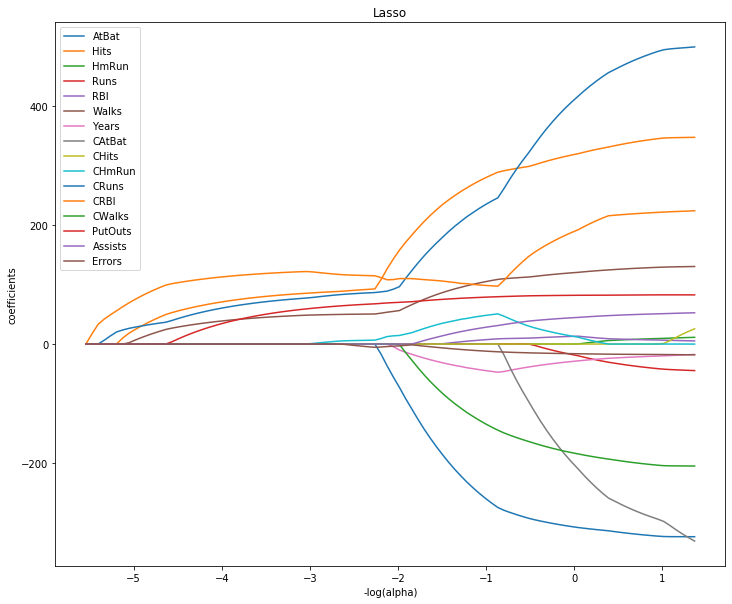

In [70]:
scaler = StandardScaler()

# Pridictors
X = hitters.drop(['Player','Salary'],axis=1)
predictors = list(X)
X = scaler.fit_transform(X.values)
# Label
Y = hitters['Salary']

lasso_alphas, lasso_coefs,_ = linear_model.lasso_path(X, Y)
log_lasso_alphas = -np.log(lasso_alphas)

plt.figure(1, figsize = (12, 10))
for coef, l in zip(lasso_coefs, predictors):
    feat1 = plt.plot(log_lasso_alphas, coef, label=l )

plt.xlabel('-log(alpha)')
plt.ylabel('coefficients')
plt.legend()
plt.title('Lasso Regression of Players Salary')

As the results show, the final three are "Hits" "CRBI" and "AtBat".

In [76]:
# cross-validation
lasso_cv= linear_model.LassoCV().fit(X,Y)
selected_predictors = []
for i in range(len(lasso_cv.coef_)):
    if lasso_cv.coef_[i] != 0:
        selected_predictors.append(predictors[i])
        
print("The optimal value of the regularization penality:\n",lasso_cv.alpha_)
print("The number of features left in that model:\n",len(selected_predictors))
print("The left predictors:\n", selected_predictors)

The optimal value of the regularization penality:
 3.3746790783918175
The number of features left in that model:
 12
The left predictors:
 ['AtBat', 'Hits', 'RBI', 'Walks', 'Years', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors']


In [80]:
# Split the dataset
X_train, X_test , y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

# Predict salary
lasso_cv.fit(X_train,y_train)
lasso = lasso.set_params(alpha=lasso_cv.alpha_)
lasso.fit(X_train,y_train)
print("The predicted salary of players:\n",lasso.predict(X_test))

The predicted salary of players:
 [ 701.9097805   233.70526437  622.19916619  440.51834224  389.10950517
 1008.71296237  517.31411424  137.38177985  805.15516604  419.91229738
  386.05507231 1255.16564474  460.50835466  818.91188279  675.12043272
  224.51906495  735.21741311  518.89854847  455.03675183  166.69311804
  -27.17382241  437.42610296  569.12323282  239.1491363   653.9483636
  419.63187424  936.03253084  818.07573848  842.38897592  406.10763123
  414.38981476  322.96728124  528.58316143  165.50365753  575.70786481
  360.68562599  987.53785977  731.77154304  172.35684385  667.46477141
  347.59208177  288.89417643  636.35724609  604.16062483  613.99323111
  677.58508863  318.32256519  163.72524664  662.83104538  145.7132804
  334.66227715  420.51039123  524.1237637   818.0691718   407.24235534
  608.41458052  899.36753568  344.87610399  365.63921261  387.31675343
  752.71819088  228.09879746  445.17622131  303.33985629  742.01156234
  626.89594691  467.00853169  525.52459001  4

# 1.2 Ridge Regression

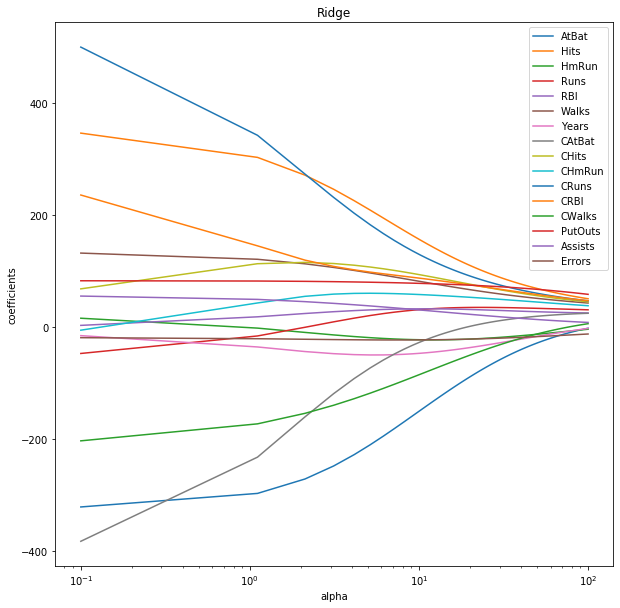

In [82]:
# Same process as LASSO regression
# Ridge regression
alphas = np.linspace(0.1, 100, 100)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)
    
plt.figure(2,figsize=(10,10))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge Regression of Players Salary')
plt.legend(predictors)
plt.show()

In [83]:
# Cross-validation
ridge_cv = linear_model.RidgeCV(alphas).fit(X,Y)
selected_predictors = []
for i in range(len(ridge_cv.coef_)):
    if ridge_cv.coef_[i] >= 0:
        selected_predictors.append(predictors[i])

print("The optimal value of the regularization penality:\n",ridge_cv.alpha_)
print("The number of features left in that model:\n",len(selected_predictors))
print("The left predictors:\n", selected_predictors)

The optimal value of the regularization penality:
 3.1272727272727274
The number of features left in that model:
 10
The left predictors:
 ['Hits', 'Runs', 'RBI', 'Walks', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'PutOuts', 'Assists']


# 2 Short Answer
#### Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.

When the model is simple, which has few predictors, the bias is high and the variance is low. In that case, the prediciton results may have a certainly difference with the true results.

When the model is complex, which has many predictors, the bias is low and the variance is high. In that case, the prediciton results may be very close to the true results, which means overfitting.

Therefore, regularization plays a role that can make a balance between bias and viariance, which helps us to select necessary predictors and avoid overfitting situation.

In number(1) models, when alpha increases, the predictors are selcted less, so that the bias is higher.
